In [1]:
import numpy as np
import pandas as pd
import os
import re
import csv
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import entropy
from scipy.optimize import curve_fit

## Declaire File Path ##

In [2]:
# nu = 0.00001(x1)
files = [
    #'../proceed_data/proceed_data_v_given/processed_data_u/0_ux_uy_data.txt',
    #'../proceed_data/proceed_data_v_given/processed_data_u/0.2_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_u/0.4_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_u/1_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_u/5_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_u/10_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_u/15_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_u/20_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_u/25_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_u/30_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_u/35_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_u/40_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_u/45_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_u/50_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_u/70_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_u/90_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_u/110_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_u/130_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_u/150_ux_uy_data.txt',
    
]

files_vor = [
    '../proceed_data/proceed_data_v_given/processed_data_vor/0.2_vor_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_vor/5_vor_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_vor/10_vor_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_vor/15_vor_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_vor/20_vor_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_vor/25_vor_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_vor/35_vor_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_vor/40_vor_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_vor/45_vor_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_vor/50_vor_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_vor/70_vor_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_vor/90_vor_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_vor/110_vor_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_vor/130_vor_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_vor/150_vor_data.txt',
    
]

# nu = 0.0001(x10)
files2 = [
    #'../proceed_data/proceed_data_v_10/processed_data_u/0_ux_uy_data.txt',
    #'../proceed_data/proceed_data_v_10/processed_data_u/0.2_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_10/processed_data_u/0.4_ux_uy_data.txt',
    #'../proceed_data/proceed_data_v_10/processed_data_u/0.6_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_10/processed_data_u/1_ux_uy_data.txt',
    #'../proceed_data/proceed_data_v_10/processed_data_u/2_ux_uy_data.txt',
    #'../proceed_data/proceed_data_v_10/processed_data_u/3_ux_uy_data.txt',
    #'../proceed_data/proceed_data_v_10/processed_data_u/4_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_10/processed_data_u/5_ux_uy_data.txt',
    #'../proceed_data/proceed_data_v_10/processed_data_u/6_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_10/processed_data_u/10_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_10/processed_data_u/15_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_10/processed_data_u/20_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_10/processed_data_u/25_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_10/processed_data_u/30_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_10/processed_data_u/35_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_10/processed_data_u/40_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_10/processed_data_u/45_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_10/processed_data_u/50_ux_uy_data.txt',
]

files2_vor = [
    '../proceed_data/proceed_data_v_10/processed_data_vor/0.2_vor_data.txt',
    '../proceed_data/proceed_data_v_10/processed_data_vor/5_vor_data.txt',
    '../proceed_data/proceed_data_v_10/processed_data_vor/15_vor_data.txt',
    '../proceed_data/proceed_data_v_10/processed_data_vor/20_vor_data.txt',
    '../proceed_data/proceed_data_v_10/processed_data_vor/25_vor_data.txt',
    '../proceed_data/proceed_data_v_10/processed_data_vor/35_vor_data.txt',
    '../proceed_data/proceed_data_v_10/processed_data_vor/40_vor_data.txt',
    '../proceed_data/proceed_data_v_10/processed_data_vor/45_vor_data.txt',
    '../proceed_data/proceed_data_v_10/processed_data_vor/50_vor_data.txt',
]

# nu = 0.000005(x0.5)
files3 = [
    '../../Dropbox/datafile/2x_data/0.4_ux_uy_data.txt',
    '../../Dropbox/datafile/2x_data/1_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_u/5_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_u/15_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_u/10_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_u/20_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_u/25_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_u/30_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_u/35_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_u/40_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_u/45_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_u/50_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_u/70_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_u/90_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_u/110_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_u/130_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_u/150_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_u/170_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_u/186_ux_uy_data.txt',
]

files3_vor = [
    '../proceed_data/proceed_data_v_half/processed_data_vor/0.2_vor_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_vor/5_vor_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_vor/10_vor_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_vor/15_vor_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_vor/20_vor_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_vor/25_vor_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_vor/35_vor_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_vor/40_vor_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_vor/45_vor_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_vor/50_vor_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_vor/70_vor_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_vor/90_vor_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_vor/110_vor_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_vor/130_vor_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_vor/150_vor_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_vor/170_vor_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_vor/186_vor_data.txt',
]

# nu = 0.00002(x2)
files4 = [
    #'../2x/u/0_ux_uy_data.txt',
    '../../Dropbox/datafile/2x_data/0.4_ux_uy_data.txt',
    '../../Dropbox/datafile/2x_data/1_ux_uy_data.txt',
    '../2x/u/5_ux_uy_data.txt',
    '../2x/u/10_ux_uy_data.txt',
    '../2x/u/15_ux_uy_data.txt',
    '../2x/u/20_ux_uy_data.txt',
    '../2x/u/25_ux_uy_data.txt',
    '../2x/u/30_ux_uy_data.txt',
    '../2x/u/35_ux_uy_data.txt',
    '../2x/u/40_ux_uy_data.txt',
    '../2x/u/45_ux_uy_data.txt',
    '../2x/u/50_ux_uy_data.txt',
    '../2x/u/70_ux_uy_data.txt',
    '../2x/u/90_ux_uy_data.txt',
    '../2x/u/110_ux_uy_data.txt',
    '../2x/u/130_ux_uy_data.txt',
    '../2x/u/150_ux_uy_data.txt',
]

files4_vor = [
    '../2x/vor/0.2_vor_data.txt',
    '../2x/vor/5_vor_data.txt',
    #'../2x/vor/10_vor_data.txt',
    '../2x/vor/15_vor_data.txt',
    '../2x/vor/20_vor_data.txt',
    '../2x/vor/25_vor_data.txt',
    '../2x/vor/30_vor_data.txt',
    '../2x/vor/35_vor_data.txt',
    '../2x/vor/40_vor_data.txt',
    '../2x/vor/45_vor_data.txt',
    '../2x/vor/50_vor_data.txt',
    '../2x/vor/70_vor_data.txt',
    '../2x/vor/90_vor_data.txt',
    '../2x/vor/110_vor_data.txt',
    '../2x/vor/130_vor_data.txt',
    '../2x/vor/150_vor_data.txt',
    
]

## function ##

In [3]:
def sep(data):
    df = pd.read_csv(data)
    ux = df['ux'].values
    uy = df['uy'].values
    
    return ux, uy
    
def resizing(ux, uy):
    N = 1024
    ux_2d = ux.reshape((N, N))
    uy_2d = uy.reshape((N, N))
    return ux_2d, uy_2d

In [4]:
# vorticity
def vor_stat(file, entropies, std_devs, sigma, mean_devs, time):

    t = float(file.split('/')[-1].split('_')[0])

    data = pd.read_csv(file, header=None, dtype=str).squeeze()
    data = pd.to_numeric(data, errors='coerce')
    data = data.dropna().values  # NaN 제거

    data = data[data != 0]

    # histogram
    #plt.hist(data, bins=100, density=True, alpha=0.4, label=f"t = {t}")
    # 히스토그램 계산
    hist, bin_edges = np.histogram(data, bins=512, density=True)

    # 엔트로피 계산
    H = entropy(hist)
    time.append(t)
    
    entropies.append(H)
    mean, std = norm.fit(data)
    std_devs.append((t, std))
    sigma.append(std)
    mean_devs.append((t, mean))
    x = np.linspace(data.min(), data.max(), 1000)
    pdf = norm.pdf(x, mean, std)
    plt.plot(x, pdf, linestyle='--', label=f"t = {t}")
    
    return entropies, std_devs, sigma, mean_devs, time

In [5]:
def vel_stat(file, entropies, std_devs, sigma, mean_devs, time):

    t = float(file.split('/')[-1].split('_')[0])
    
    data = sep(file)
    data = np.array(data)

    #plt.hist(data, bins=100, density=True, alpha=0.4, label=f"t = {t}")
    hist, bin_edges = np.histogram(data, bins=512, density=True)

    # 엔트로피 계산
    H = entropy(hist)
    time.append(t)
    
    entropies.append(H)
    mean, std = norm.fit(data)
    std_devs.append((t, std))
    sigma.append(std)
    mean_devs.append((t, mean))
    x = np.linspace(data.min(), data.max(), 1000)
    pdf = norm.pdf(x, mean, std)
    plt.plot(x, pdf, linestyle='--', label=f"t = {t}")
    
    return entropies, std_devs, sigma, mean_devs, time

In [6]:
def fitting(time, sigma, start):
    plt.loglog(time, sigma, marker='o', linestyle='--', label='Data')
    
    x_fit = time[start:]
    y_fit = sigma[start:]

    log_x = np.log(x_fit)
    log_y = np.log(y_fit)
    
    # log(y) = a + b*log(x)
    coeffs = np.polyfit(log_x, log_y, 1)
    b = coeffs[0]        # slope
    a = coeffs[1]        # intercept
    
    # y = exp(a) * x^b
    fitted_sigma = np.exp(a) * time**b
    
    plt.loglog(time, fitted_sigma, label=f'Fit: y = {np.exp(a):.2f} x^{b:.2f}')
    print(f"Slope (b)   : {b:.4f}")
    print(f"Intercept(a): {a:.4f}  (=> exp(a)={np.exp(a):.4f})")
    return a, b, fitted_sigma

## Plot All vorticity disstribution (No statsitic) ##

14680064


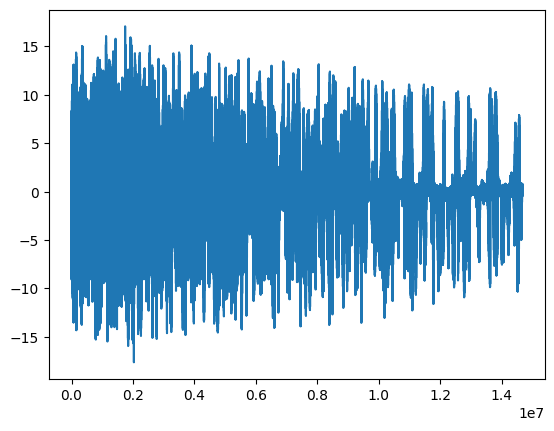

In [42]:
DataNum = len(files_vor)

all_data=[]

for file in files_vor:
    data = pd.read_csv(file, header=None, dtype=str).squeeze()
    data = pd.to_numeric(data, errors='coerce')
    data = data.dropna().values
    all_data.extend(data.tolist())

x = np.linspace(0, len(data)*DataNum, len(data)*DataNum)
print(len(all_data))
plt.plot(x, all_data)

9437184


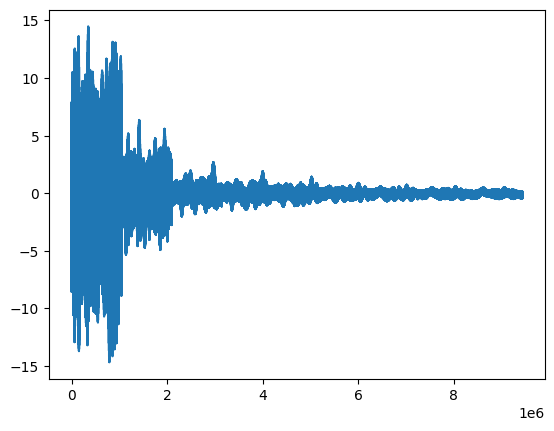

In [43]:
DataNum = len(files2_vor)

all_data=[]

for file in files2_vor:
    data = pd.read_csv(file, header=None, dtype=str).squeeze()
    data = pd.to_numeric(data, errors='coerce')
    data = data.dropna().values
    all_data.extend(data.tolist())

x = np.linspace(0, len(data)*DataNum, len(data)*DataNum)
print(len(all_data))
plt.plot(x, all_data)

## Possibility distribution (Given 'v') ##

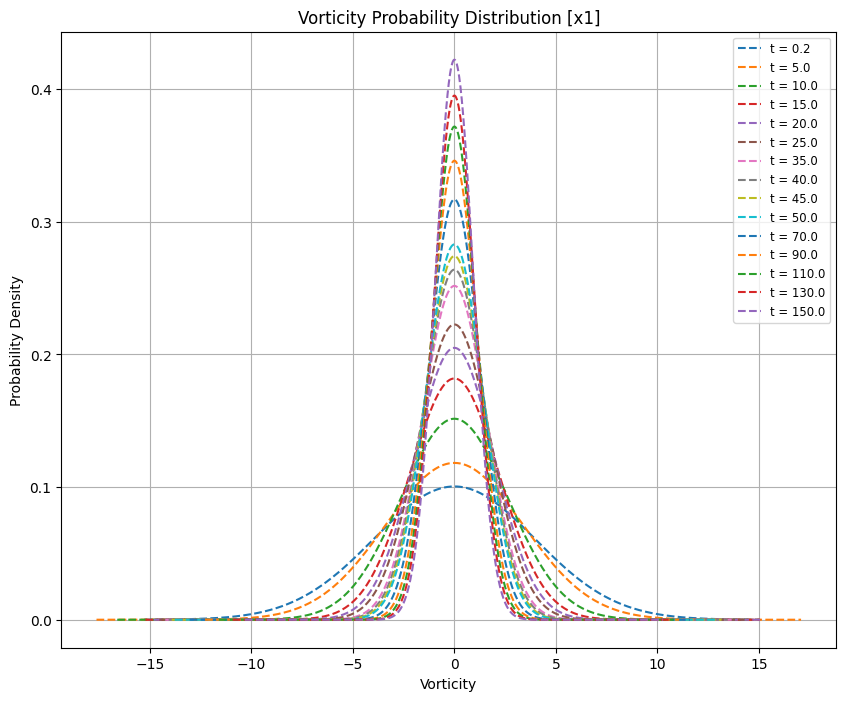

Time (t)   |   Standard Deviation
--------------------------------------
t = 0.2     |   Sigma = 3.9709410611
t = 5.0     |   Sigma = 3.3749762930
t = 10.0    |   Sigma = 2.6332504875
t = 15.0    |   Sigma = 2.1938157761
t = 20.0    |   Sigma = 1.9465861269
t = 25.0    |   Sigma = 1.7922937559
t = 35.0    |   Sigma = 1.5852581278
t = 40.0    |   Sigma = 1.5117028696
t = 45.0    |   Sigma = 1.4552467723
t = 50.0    |   Sigma = 1.4100452688
t = 70.0    |   Sigma = 1.2591477608
t = 90.0    |   Sigma = 1.1529162891
t = 110.0   |   Sigma = 1.0731815640
t = 130.0   |   Sigma = 1.0097291717
t = 150.0   |   Sigma = 0.9450240680


In [15]:
std_devs1 = []
mean_devs1 = []
entropies1 = []
time1 = []
sigma1 = []

plt.figure(figsize=(10, 8))

for file in files_vor:
    entropies1, std_devs1, sigma1, mean_devs1, time1= vor_stat(file, entropies1, std_devs1, sigma1, mean_devs1, time1)
                                                               
plt.title("Vorticity Probability Distribution [x1]")
plt.xlabel("Vorticity")
plt.ylabel("Probability Density")
plt.legend(loc="best", fontsize='small')
plt.grid(True)
plt.show()

print("Time (t)   |   Standard Deviation")
print("--------------------------------------")
for t, std in std_devs1:
    print(f"t = {t:<7} |   Sigma = {std:.10f}")

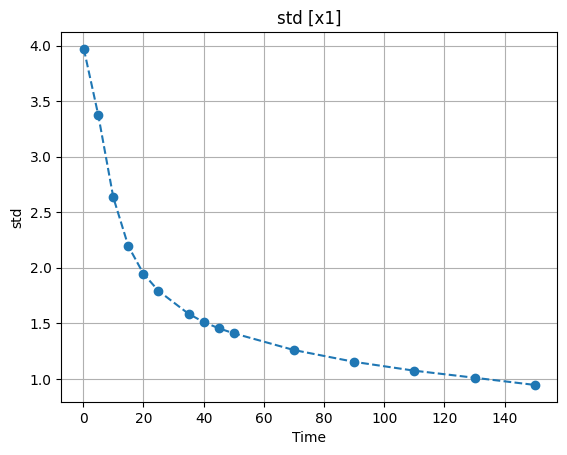

Slope (b)   : -0.3691
Intercept(a): 1.7914  (=> exp(a)=5.9976)


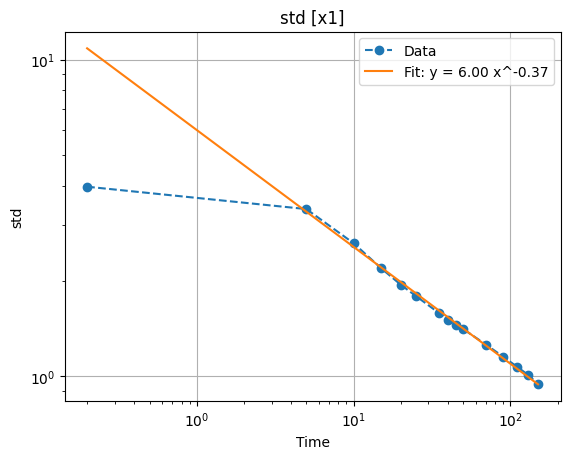

In [17]:
plt.plot(time1, sigma1, marker='o', linestyle='--')
plt.title("std [x1]")
plt.xlabel("Time")
plt.ylabel("std")
plt.grid(True)
plt.show()

plt.figure()
a1, b1, fitted_sigma1 = fitting(time1, sigma1, 1)


plt.title("std [x1]")
plt.xlabel("Time")
plt.ylabel("std")
plt.grid(True)
plt.legend()
plt.show()

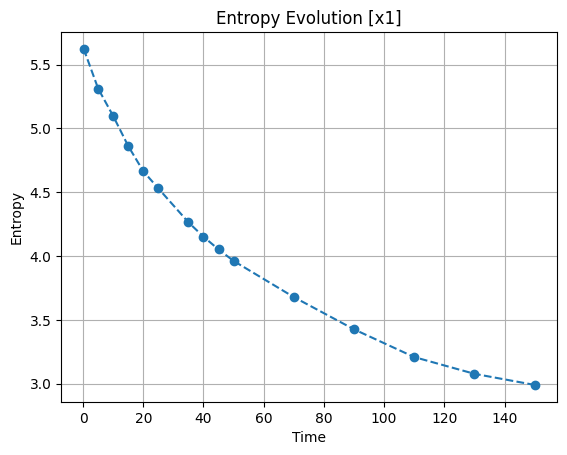

In [18]:

plt.plot(time1, entropies1, marker='o', linestyle='--')
plt.title("Entropy Evolution [x1]")
plt.xlabel("Time")
plt.ylabel("Entropy")
plt.grid(True)
plt.show()

## Possibility distribution (10 times 'v') ##

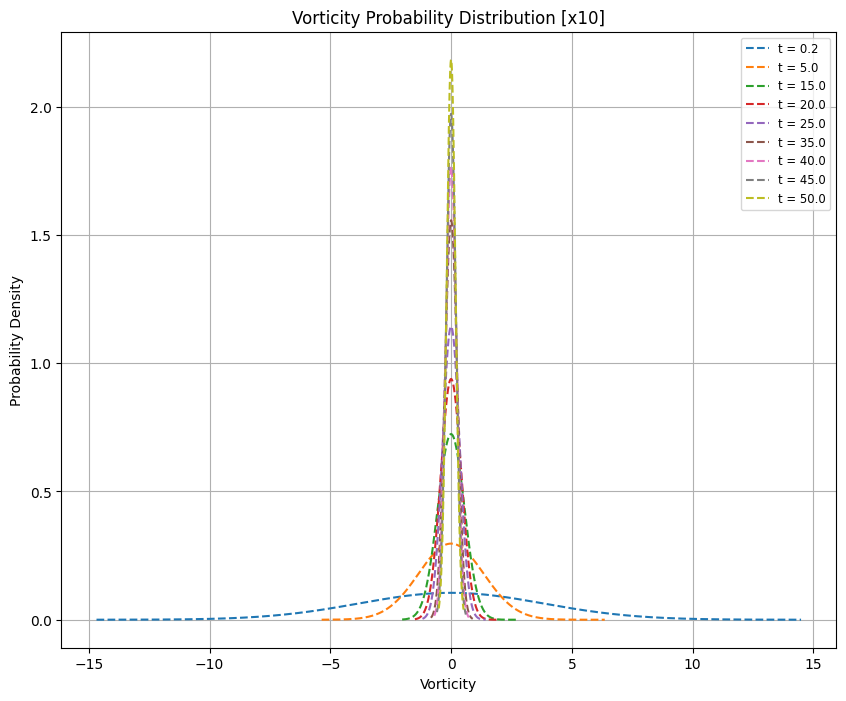

Time (t)   |   Standard Deviation
--------------------------------------
t = 0.2     |   Sigma = 3.8035010122
t = 5.0     |   Sigma = 1.3441899424
t = 15.0    |   Sigma = 0.5512383245
t = 20.0    |   Sigma = 0.4251108222
t = 25.0    |   Sigma = 0.3490216433
t = 35.0    |   Sigma = 0.2562255941
t = 40.0    |   Sigma = 0.2259203371
t = 45.0    |   Sigma = 0.2022806959
t = 50.0    |   Sigma = 0.1827539059


In [20]:
std_devs2 = []
mean_devs2 = []
entropies2 = []
time2 = []
sigma2 = []

plt.figure(figsize=(10, 8))

for file in files2_vor:
    entropies2, std_devs2, sigma2, mean_devs2, time2= vor_stat(file, entropies2, std_devs2, sigma2, mean_devs2, time2)
                                                               
plt.title("Vorticity Probability Distribution [x10]")
plt.xlabel("Vorticity")
plt.ylabel("Probability Density")
plt.legend(loc="best", fontsize='small')
plt.grid(True)
plt.show()

print("Time (t)   |   Standard Deviation")
print("--------------------------------------")
for t, std in std_devs2:
    print(f"t = {t:<7} |   Sigma = {std:.10f}")

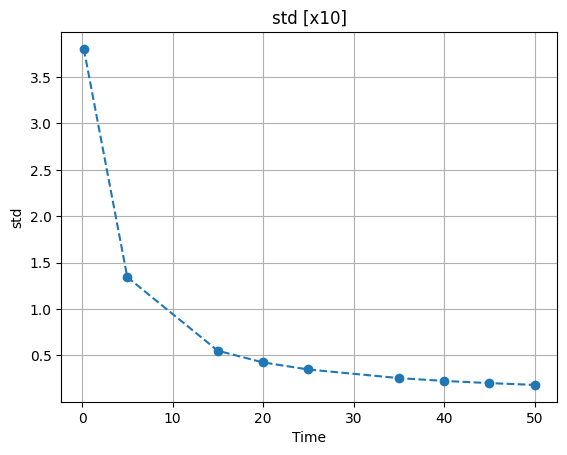

Slope (b)   : -0.9156
Intercept(a): 1.8884  (=> exp(a)=6.6089)


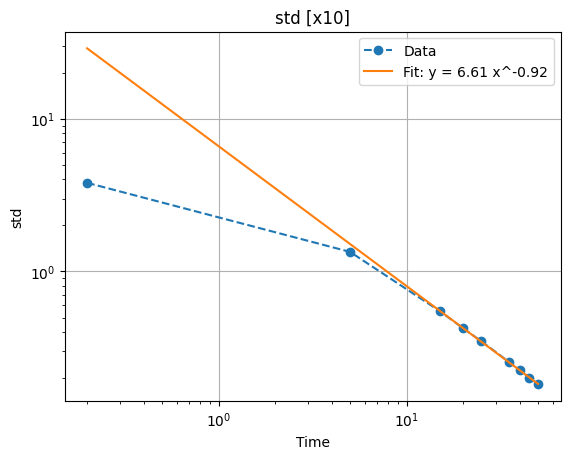

In [25]:
plt.plot(time2, sigma2, marker='o', linestyle='--')
plt.title("std [x10]")
plt.xlabel("Time")
plt.ylabel("std")
plt.grid(True)
plt.show()

plt.figure()
a2, b2, fitted_sigma2 = fitting(time2, sigma2, 2)


plt.title("std [x10]")
plt.xlabel("Time")
plt.ylabel("std")
plt.grid(True)
plt.legend()
plt.show()

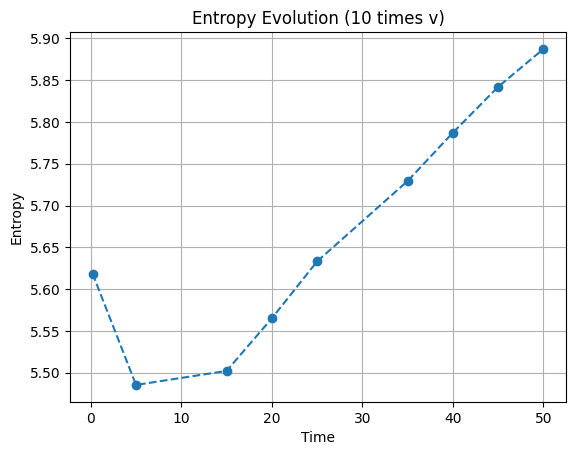

In [22]:
plt.plot(time2, entropies2, marker='o', linestyle='--')
plt.title("Entropy Evolution (10 times v)")
plt.xlabel("Time")
plt.ylabel("Entropy")
plt.grid(True)
plt.show()

## Half pdf ##

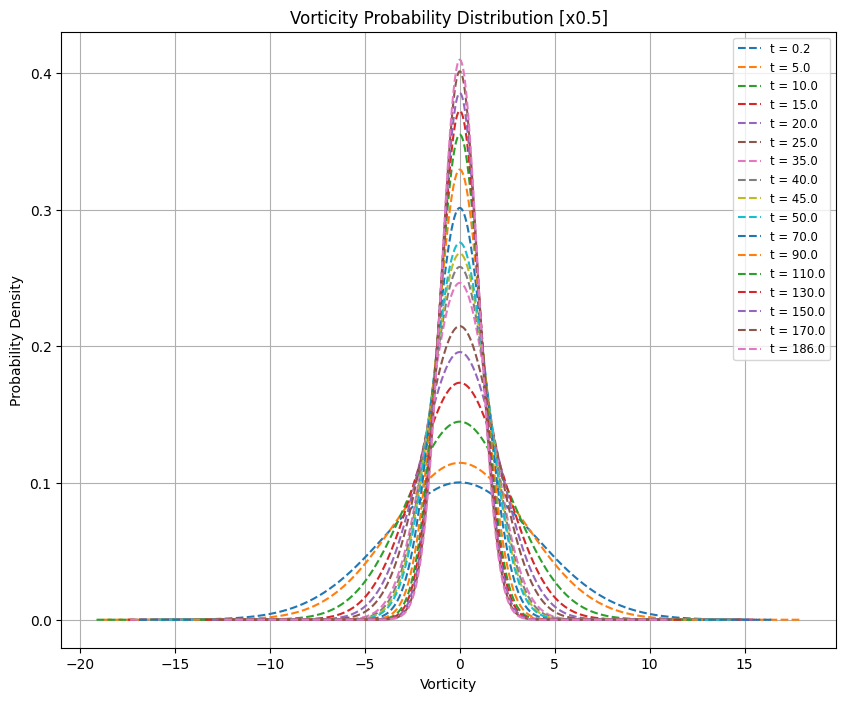

Time (t)   |   Standard Deviation
--------------------------------------
t = 0.2     |   Sigma = 3.9718123127
t = 5.0     |   Sigma = 3.4763860375
t = 10.0    |   Sigma = 2.7535242756
t = 15.0    |   Sigma = 2.3015106466
t = 20.0    |   Sigma = 2.0376525668
t = 25.0    |   Sigma = 1.8580442807
t = 35.0    |   Sigma = 1.6192747474
t = 40.0    |   Sigma = 1.5460319396
t = 45.0    |   Sigma = 1.4893495179
t = 50.0    |   Sigma = 1.4464333995
t = 70.0    |   Sigma = 1.3244771323
t = 90.0    |   Sigma = 1.2116837985
t = 110.0   |   Sigma = 1.1245012138
t = 130.0   |   Sigma = 1.0719420833
t = 150.0   |   Sigma = 1.0356025046
t = 170.0   |   Sigma = 0.9945228332
t = 186.0   |   Sigma = 0.9740339146


In [26]:
std_devs3 = []
mean_devs3 = []
entropies3 = []
time3 = []
sigma3 = []

plt.figure(figsize=(10, 8))

for file in files3_vor:
    entropies3, std_devs3, sigma3, mean_devs3, time3= vor_stat(file, entropies3, std_devs3, sigma3, mean_devs3, time3)
                                                               
plt.title("Vorticity Probability Distribution [x0.5]")
plt.xlabel("Vorticity")
plt.ylabel("Probability Density")
plt.legend(loc="best", fontsize='small')
plt.grid(True)
plt.show()

print("Time (t)   |   Standard Deviation")
print("--------------------------------------")
for t, std in std_devs3:
    print(f"t = {t:<7} |   Sigma = {std:.10f}")

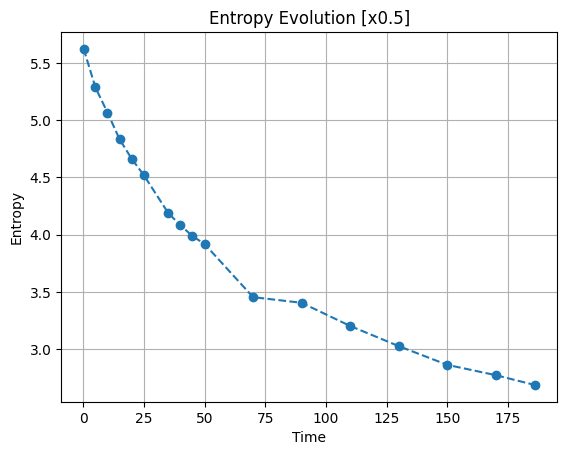

In [27]:

plt.plot(time3, entropies3, marker='o', linestyle='--')
plt.title("Entropy Evolution [x0.5]")
plt.xlabel("Time")
plt.ylabel("Entropy")
plt.grid(True)
plt.show()

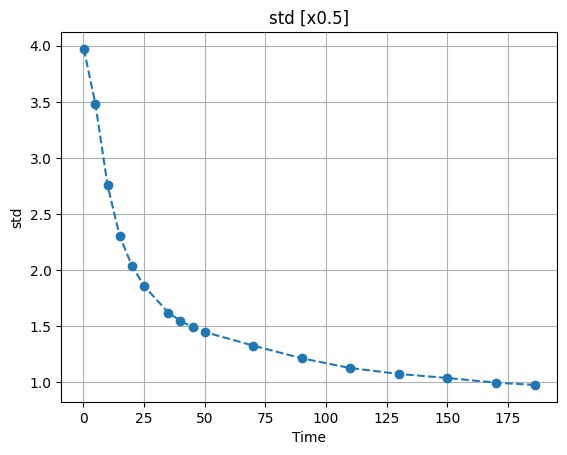

Slope (b)   : -0.3526
Intercept(a): 1.7783  (=> exp(a)=5.9195)


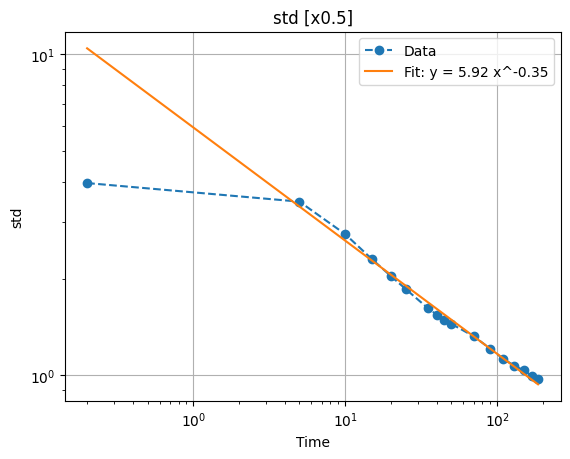

In [28]:
plt.plot(time3, sigma3, marker='o', linestyle='--')
plt.title("std [x0.5]")
plt.xlabel("Time")
plt.ylabel("std")
plt.grid(True)
plt.show()

plt.figure()
a3, b3, fitted_sigma3 = fitting(time3, sigma3, 1)


plt.title("std [x0.5]")
plt.xlabel("Time")
plt.ylabel("std")
plt.grid(True)
plt.legend()
plt.show()

## 2x ##

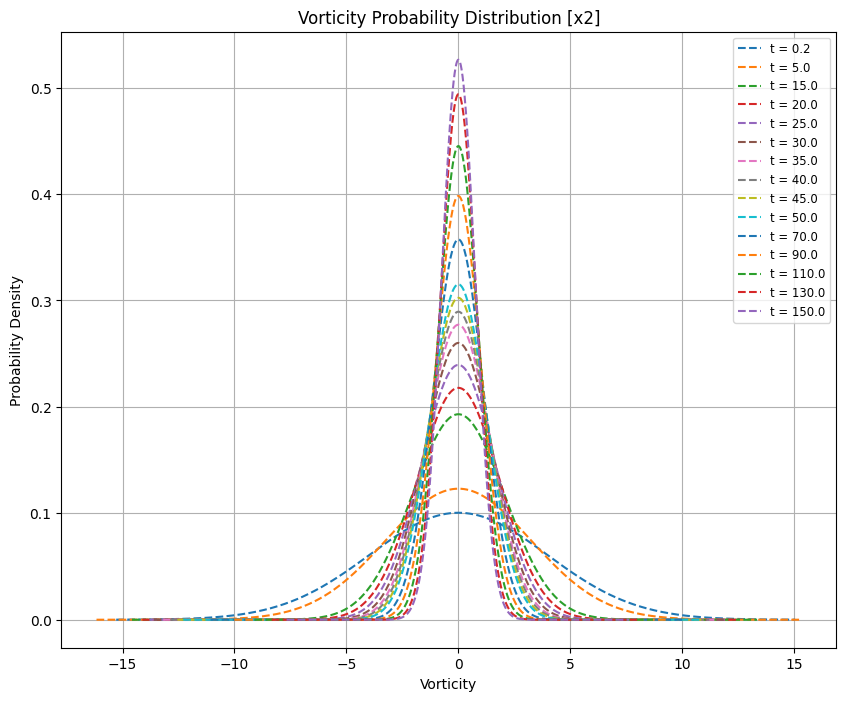

Time (t)   |   Standard Deviation
--------------------------------------
t = 0.2     |   Sigma = 3.9691994286
t = 5.0     |   Sigma = 3.2401358194
t = 15.0    |   Sigma = 2.0661298276
t = 20.0    |   Sigma = 1.8309907760
t = 25.0    |   Sigma = 1.6663048207
t = 30.0    |   Sigma = 1.5338223960
t = 35.0    |   Sigma = 1.4391699772
t = 40.0    |   Sigma = 1.3782630814
t = 45.0    |   Sigma = 1.3188684253
t = 50.0    |   Sigma = 1.2657993461
t = 70.0    |   Sigma = 1.1162869255
t = 90.0    |   Sigma = 1.0019084068
t = 110.0   |   Sigma = 0.8963507400
t = 130.0   |   Sigma = 0.8078626534
t = 150.0   |   Sigma = 0.7581384680


In [29]:
std_devs4 = []
mean_devs4 = []
entropies4 = []
time4 = []
sigma4 = []

plt.figure(figsize=(10, 8))

for file in files4_vor:
    entropies4, std_devs4, sigma4, mean_devs4, time4= vor_stat(file, entropies4, std_devs4, sigma4, mean_devs4, time4)                                            
plt.title("Vorticity Probability Distribution [x2]")
plt.xlabel("Vorticity")
plt.ylabel("Probability Density")
plt.legend(loc="best", fontsize='small')
plt.grid(True)
plt.show()

print("Time (t)   |   Standard Deviation")
print("--------------------------------------")
for t, std in std_devs4:
    print(f"t = {t:<7} |   Sigma = {std:.10f}")

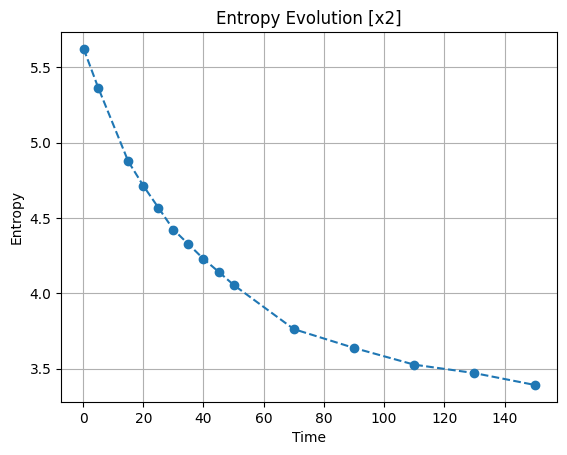

In [30]:
plt.plot(time4, entropies4, marker='o', linestyle='--')
plt.title("Entropy Evolution [x2]")
plt.xlabel("Time")
plt.ylabel("Entropy")
plt.grid(True)
plt.show()

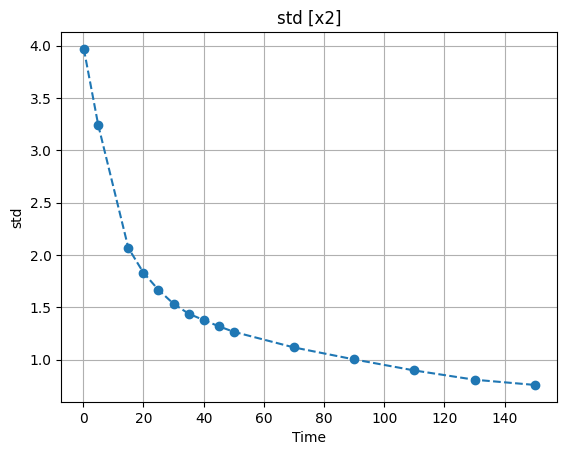

Slope (b)   : -0.4209
Intercept(a): 1.8669  (=> exp(a)=6.4682)


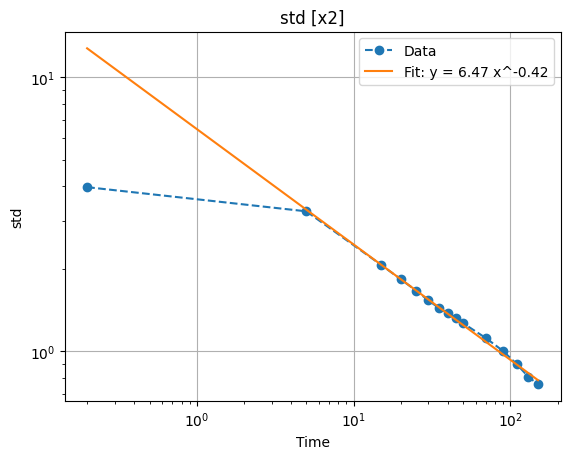

In [31]:
plt.plot(time4, sigma4, marker='o', linestyle='--')
plt.title("std [x2]")
plt.xlabel("Time")
plt.ylabel("std")
plt.grid(True)
plt.show()

plt.figure()
a4, b4, fitted_sigma4 = fitting(time4, sigma4, 1)

plt.title("std [x2]")
plt.xlabel("Time")
plt.ylabel("std")
plt.grid(True)
plt.legend()
plt.show()

## Regression(from volticity) ##

Time (t)   |   Standard Deviation   |   Time expected
-----------------------------------------------------
t = 0.2     |   Sigma = 3.8035010122   |   3.4346
t = 5.0     |   Sigma = 1.3441899424   |   57.5102
t = 15.0    |   Sigma = 0.5512383245   |   643.5510
t = 20.0    |   Sigma = 0.4251108222   |   1301.0558
t = 25.0    |   Sigma = 0.3490216433   |   2219.9806
t = 35.0    |   Sigma = 0.2562255941   |   5128.8696
t = 40.0    |   Sigma = 0.2259203371   |   7213.2817
t = 45.0    |   Sigma = 0.2022806959   |   9731.5712
t = 50.0    |   Sigma = 0.1827539059   |   12812.4189


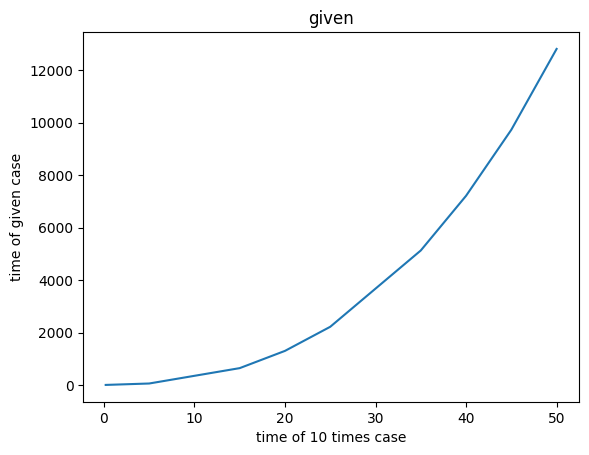

In [32]:
# given case

time_regression1 = []
for i in range (0, 9):
    time = (std_devs2[i][1] / np.exp(a1))**(1/b1)
    time_regression1.append(time)
plt.title('given')
plt.xlabel('time of 10 times case')
plt.ylabel('time of given case')
plt.plot(time2, time_regression1)

print("Time (t)   |   Standard Deviation   |   Time expected")
print("-----------------------------------------------------")
for (t, std), time_expected in zip(std_devs2, time_regression1):
    print(f"t = {t:<7} |   Sigma = {std:.10f}   |   {time_expected:.4f}")

Time (t)   |   Standard Deviation   |   Time expected
-----------------------------------------------------
t = 0.2     |   Sigma = 3.8035010122   |   3.5060
t = 5.0     |   Sigma = 1.3441899424   |   66.9764
t = 15.0    |   Sigma = 0.5512383245   |   839.0978
t = 20.0    |   Sigma = 0.4251108222   |   1753.1677
t = 25.0    |   Sigma = 0.3490216433   |   3067.1122
t = 35.0    |   Sigma = 0.2562255941   |   7369.0383
t = 40.0    |   Sigma = 0.2259203371   |   10530.5024
t = 45.0    |   Sigma = 0.2022806959   |   14407.2636
t = 50.0    |   Sigma = 0.1827539059   |   19213.9280


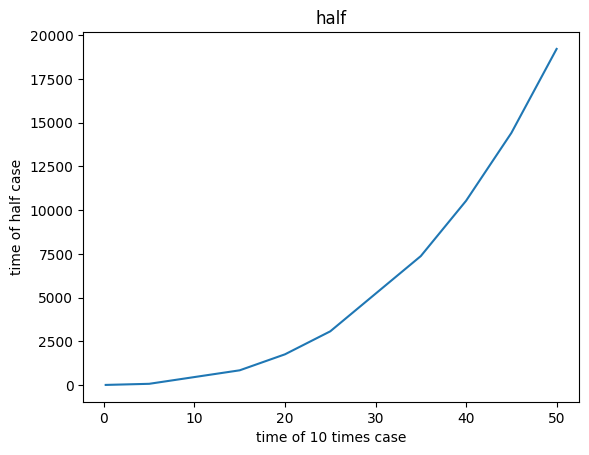

In [33]:
# half case

time_regression3 = []
for i in range (0, 9):
    time = (std_devs2[i][1] / np.exp(a3))**(1/b3)
    time_regression3.append(time)
plt.title('half')
plt.xlabel('time of 10 times case')
plt.ylabel('time of half case')
plt.plot(time2, time_regression3)

print("Time (t)   |   Standard Deviation   |   Time expected")
print("-----------------------------------------------------")
for (t, std), time_expected in zip(std_devs2, time_regression3):
    print(f"t = {t:<7} |   Sigma = {std:.10f}   |   {time_expected:.4f}")

Time (t)   |   Standard Deviation   |   Time expected
-----------------------------------------------------
t = 0.2     |   Sigma = 3.8035010122   |   3.5304
t = 5.0     |   Sigma = 1.3441899424   |   41.7809
t = 15.0    |   Sigma = 0.5512383245   |   347.2607
t = 20.0    |   Sigma = 0.4251108222   |   643.7560
t = 25.0    |   Sigma = 0.3490216433   |   1028.4855
t = 35.0    |   Sigma = 0.2562255941   |   2143.3143
t = 40.0    |   Sigma = 0.2259203371   |   2890.3990
t = 45.0    |   Sigma = 0.2022806959   |   3758.3112
t = 50.0    |   Sigma = 0.1827539059   |   4783.3411


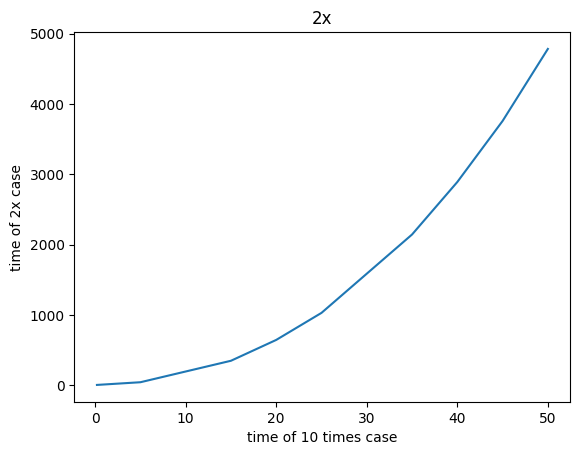

In [34]:
# 2x
time_regression4 = []
for i in range (0, 9):
    time = (std_devs2[i][1] / np.exp(a4))**(1/b4)
    time_regression4.append(time)
plt.title('2x')
plt.xlabel('time of 10 times case')
plt.ylabel('time of 2x case')
plt.plot(time2, time_regression4)

print("Time (t)   |   Standard Deviation   |   Time expected")
print("-----------------------------------------------------")
for (t, std), time_expected in zip(std_devs2, time_regression4):
    print(f"t = {t:<7} |   Sigma = {std:.10f}   |   {time_expected:.4f}")

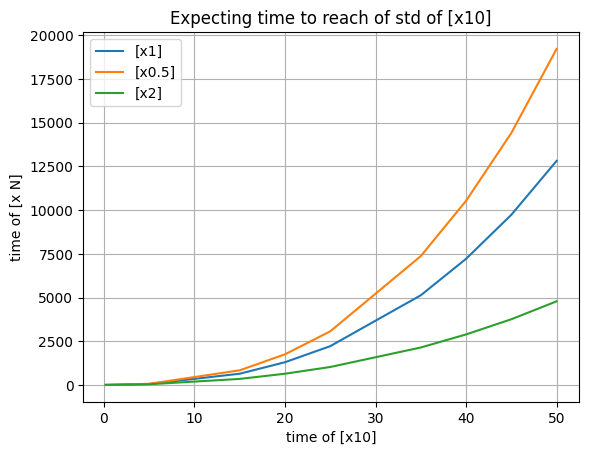

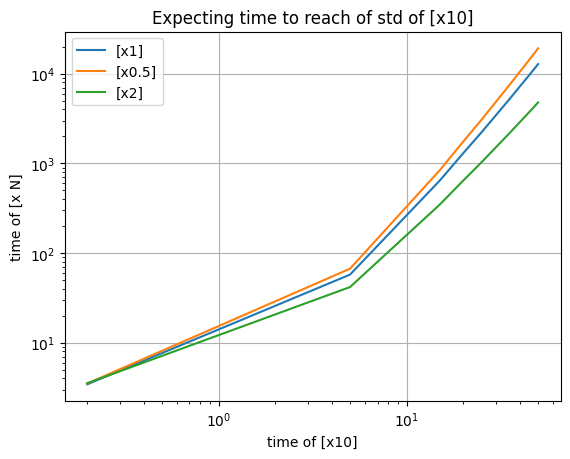

In [40]:
plt.figure()
plt.title('Expecting time to reach of std of [x10]')
plt.plot(time2, time_regression1, label='[x1]')
plt.plot(time2, time_regression3, label='[x0.5]')
plt.plot(time2, time_regression4, label='[x2]')
plt.xlabel('time of [x10]')
plt.ylabel('time of [x N]')
plt.legend()
plt.grid()
plt.show()

plt.figure()
plt.title('Expecting time to reach of std of [x10]')
plt.loglog(time2, time_regression1, label='[x1]')
plt.loglog(time2, time_regression3, label='[x0.5]')
plt.loglog(time2, time_regression4, label='[x2]')
plt.xlabel('time of [x10]')
plt.ylabel('time of [x N]')
plt.legend()
plt.grid()
plt.show()

## U(given) pdf ##

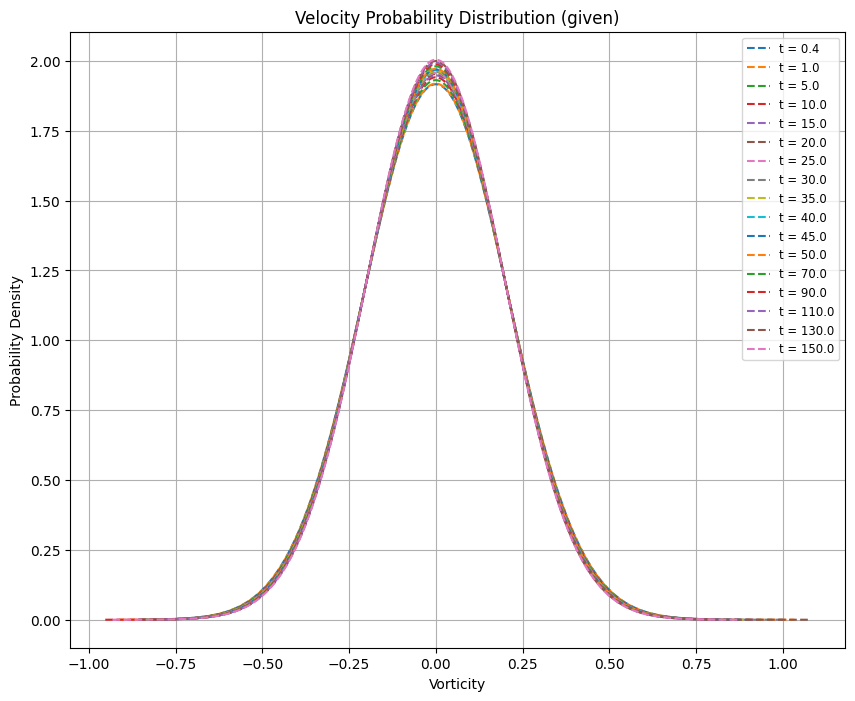

Time (t)   |   Standard Deviation
--------------------------------------
t = 0.4     |   Sigma = 0.2081786107
t = 1.0     |   Sigma = 0.2079465355
t = 5.0     |   Sigma = 0.2066069499
t = 10.0    |   Sigma = 0.2055175791
t = 15.0    |   Sigma = 0.2048107378
t = 20.0    |   Sigma = 0.2042860569
t = 25.0    |   Sigma = 0.2038559771
t = 30.0    |   Sigma = 0.2034851379
t = 35.0    |   Sigma = 0.2031557414
t = 40.0    |   Sigma = 0.2028595201
t = 45.0    |   Sigma = 0.2025879223
t = 50.0    |   Sigma = 0.2023338543
t = 70.0    |   Sigma = 0.2014442929
t = 90.0    |   Sigma = 0.2007170255
t = 110.0   |   Sigma = 0.2001016099
t = 130.0   |   Sigma = 0.1995527929
t = 150.0   |   Sigma = 0.1990729662


In [12]:
std_devs_u = []
mean_devs_u = []
entropies_u = []
time_u = []
sigma_u = []

plt.figure(figsize=(10, 8))

for file in files:
    t = float(file.split('/')[-1].split('_')[0])
    if t==0:
        continue
    entropies_u, std_devs_u, sigma_u, mean_devs_u, time_u = vel_stat(file, entropies_u, std_devs_u, sigma_u, mean_devs_u, time_u)

plt.title("Velocity Probability Distribution (given)")
plt.xlabel("Vorticity")
plt.ylabel("Probability Density")
plt.legend(loc="best", fontsize='small')
plt.grid(True)
plt.show()

print("Time (t)   |   Standard Deviation")
print("--------------------------------------")
for t, std in std_devs_u:
    print(f"t = {t:<7} |   Sigma = {std:.10f}")

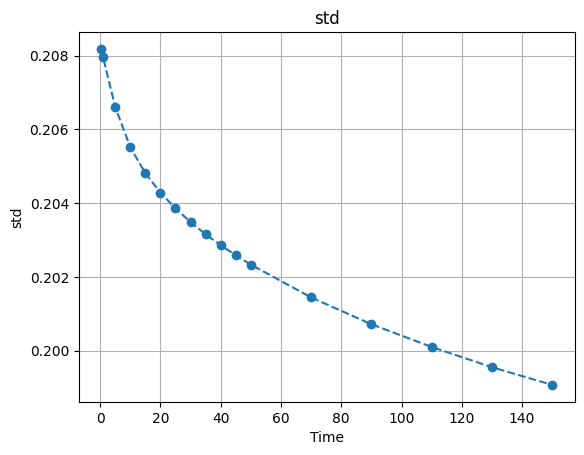

Slope (b)   : -0.0166
Intercept(a): -1.5308  (=> exp(a)=0.2164)


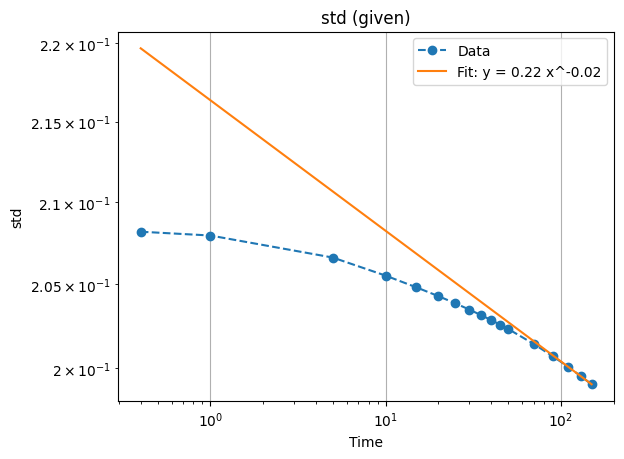

In [13]:
plt.plot(time_u, sigma_u, marker='o', linestyle='--')
plt.title("std")
plt.xlabel("Time")
plt.ylabel("std")
plt.grid(True)
plt.show()

plt.figure()
a_u, b_u, fitted_sigma_u = fitting(time_u, sigma_u, -3)

plt.title("std (given)")
plt.xlabel("Time")
plt.ylabel("std")
plt.grid(True)
plt.legend()
plt.show()

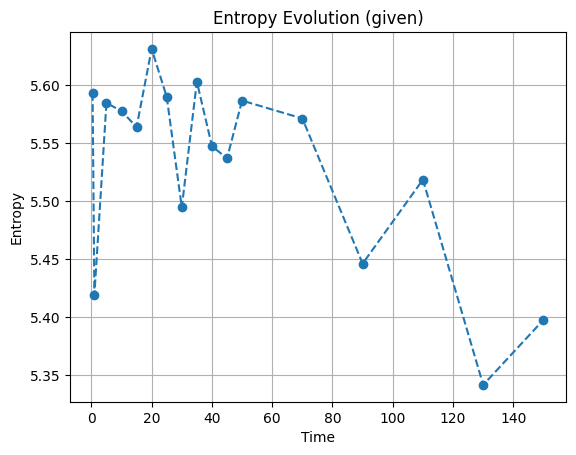

In [14]:

plt.plot(time_u, entropies_u, marker='o', linestyle='--')
plt.title("Entropy Evolution (given)")
plt.xlabel("Time")
plt.ylabel("Entropy")
plt.grid(True)
plt.show()

## U(10 times) pdf ##

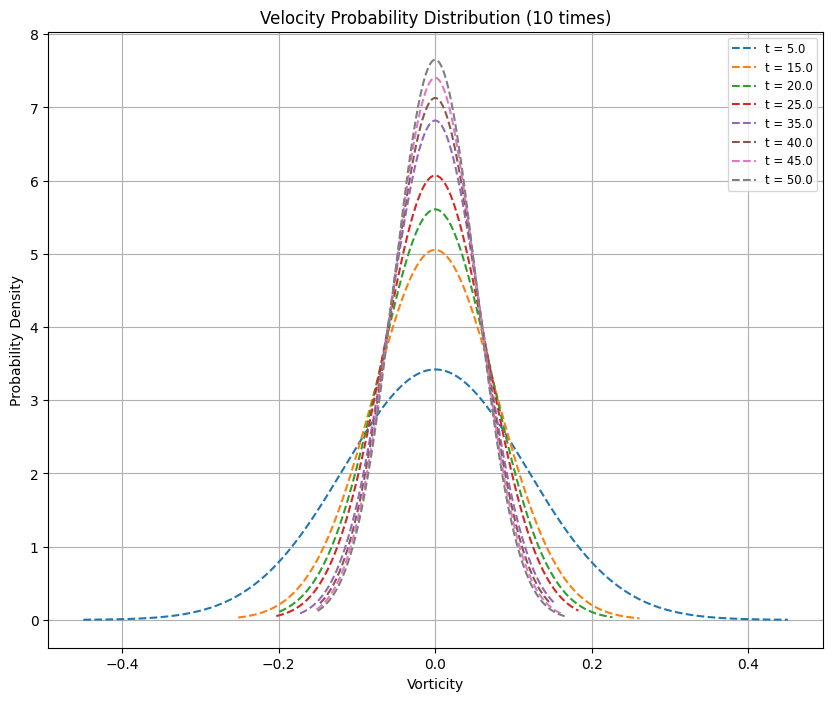

Time (t)   |   Standard Deviation
--------------------------------------
t = 5.0     |   Sigma = 0.1166312320
t = 15.0    |   Sigma = 0.0789406084
t = 20.0    |   Sigma = 0.0711378957
t = 25.0    |   Sigma = 0.0657317633
t = 35.0    |   Sigma = 0.0584916116
t = 40.0    |   Sigma = 0.0559657412
t = 45.0    |   Sigma = 0.0538848707
t = 50.0    |   Sigma = 0.0521415984


In [63]:
std_devs_u2 = []
mean_devs_u2 = []
entropies_u2 = []
time_u2 = []
sigma_u2 = []

plt.figure(figsize=(10, 8))

for file in files2:
    t = float(file.split('/')[-1].split('_')[0])
    if t==0:
        continue
    entropies_u2, std_devs_u2, sigma_u2, mean_devs_u2, time_u2 = vel_stat(file, entropies_u2, std_devs_u2, sigma_u2, mean_devs_u2, time_u2)

plt.title("Velocity Probability Distribution (10 times)")
plt.xlabel("Vorticity")
plt.ylabel("Probability Density")
plt.legend(loc="best", fontsize='small')
plt.grid(True)
plt.show()

print("Time (t)   |   Standard Deviation")
print("--------------------------------------")
for t, std in std_devs_u2:
    print(f"t = {t:<7} |   Sigma = {std:.10f}")

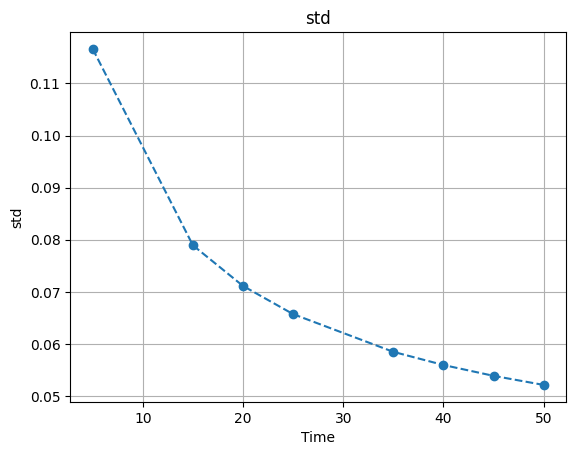

Slope (b)   : -0.3451
Intercept(a): -1.6084  (=> exp(a)=0.2002)


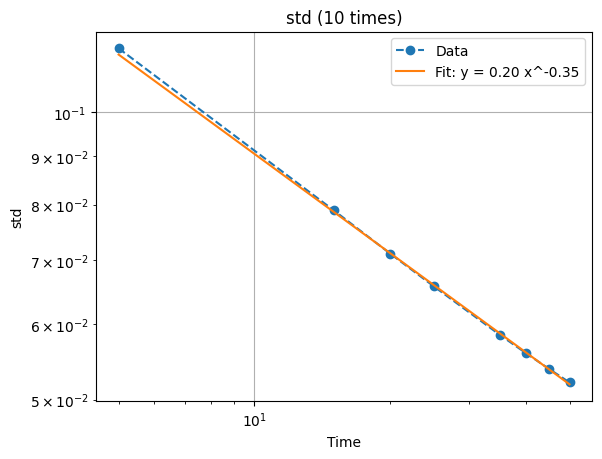

In [64]:
plt.plot(time_u2, sigma_u2, marker='o', linestyle='--')
plt.title("std")
plt.xlabel("Time")
plt.ylabel("std")
plt.grid(True)
plt.show()

plt.figure()
a_u2, b_u2, fitted_sigma_u2 = fitting(time_u2, sigma_u2, 1)


plt.title("std (10 times)")
plt.xlabel("Time")
plt.ylabel("std")
plt.grid(True)
plt.legend()
plt.show()

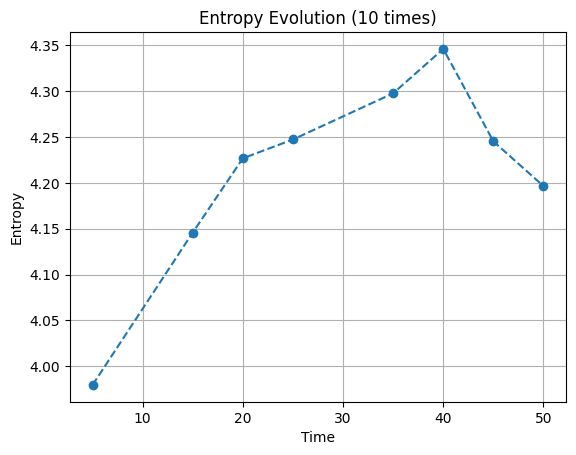

In [65]:

plt.plot(time_u2, entropies_u2, marker='o', linestyle='--')
plt.title("Entropy Evolution (10 times)")
plt.xlabel("Time")
plt.ylabel("Entropy")
plt.grid(True)
plt.show()

## U(half) pdf ##

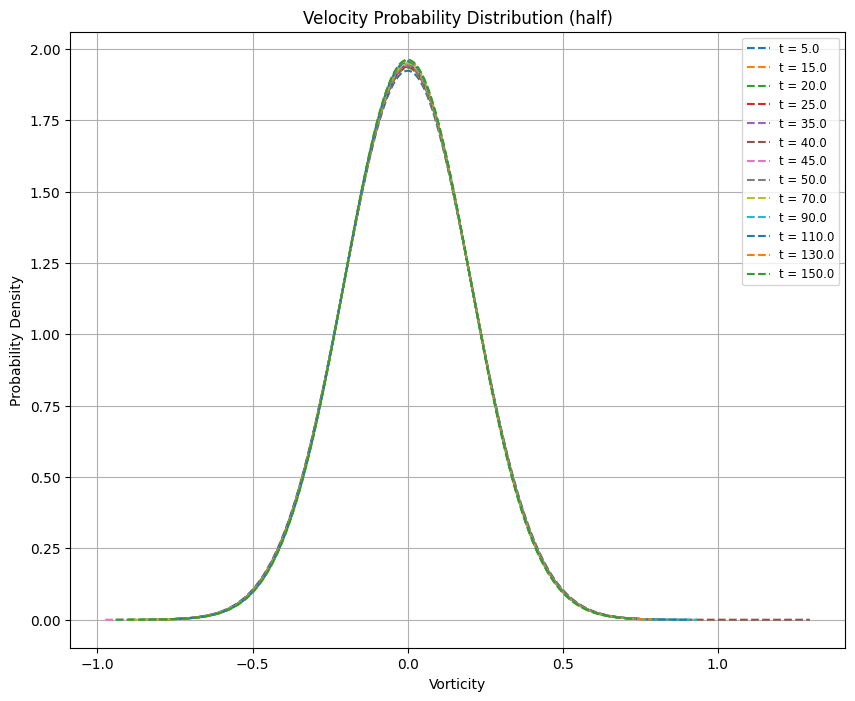

Time (t)   |   Standard Deviation
--------------------------------------
t = 5.0     |   Sigma = 0.2074433467
t = 15.0    |   Sigma = 0.2064558775
t = 20.0    |   Sigma = 0.2061666559
t = 25.0    |   Sigma = 0.2059318291
t = 35.0    |   Sigma = 0.2055620148
t = 40.0    |   Sigma = 0.2054069878
t = 45.0    |   Sigma = 0.2052654754
t = 50.0    |   Sigma = 0.2051313136
t = 70.0    |   Sigma = 0.2046568599
t = 90.0    |   Sigma = 0.2042604135
t = 110.0   |   Sigma = 0.2039237865
t = 130.0   |   Sigma = 0.2036264451
t = 150.0   |   Sigma = 0.2033504507


In [66]:
std_devs_u3 = []
mean_devs_u3 = []
entropies_u3 = []
time_u3 = []
sigma_u3 = []

plt.figure(figsize=(10, 8))

for file in files3:
    t = float(file.split('/')[-1].split('_')[0])
    if t==0:
        continue
    entropies_u3, std_devs_u3, sigma_u3, mean_devs_u3, time_u3 = vel_stat(file, entropies_u3, std_devs_u3, sigma_u3, mean_devs_u3, time_u3)

plt.title("Velocity Probability Distribution (half)")
plt.xlabel("Vorticity")
plt.ylabel("Probability Density")
plt.legend(loc="best", fontsize='small')
plt.grid(True)
plt.show()

print("Time (t)   |   Standard Deviation")
print("--------------------------------------")
for t, std in std_devs_u3:
    print(f"t = {t:<7} |   Sigma = {std:.10f}")

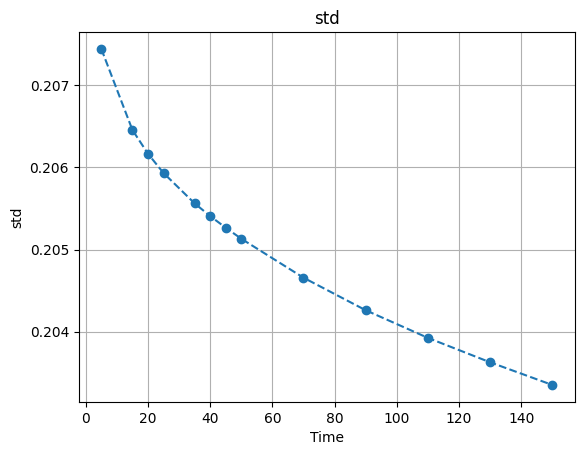

Slope (b)   : -0.0091
Intercept(a): -1.5474  (=> exp(a)=0.2128)


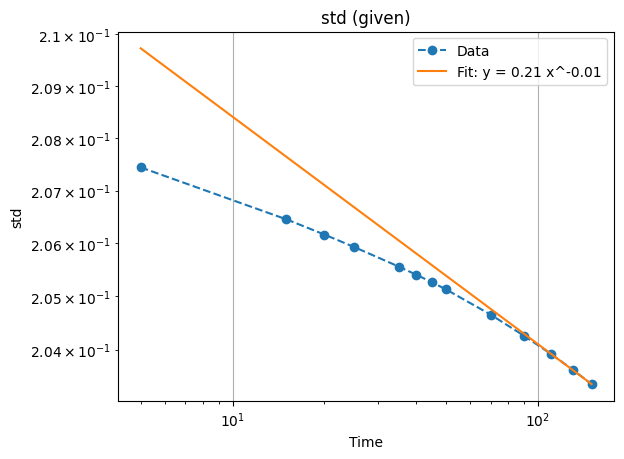

In [67]:
plt.plot(time_u3, sigma_u3, marker='o', linestyle='--')
plt.title("std")
plt.xlabel("Time")
plt.ylabel("std")
plt.grid(True)
plt.show()
plt.figure()
a_u3, b_u3, fitted_sigma_u3 = fitting(time_u3, sigma_u3, -3)
plt.title("std (given)")
plt.xlabel("Time")
plt.ylabel("std")
plt.grid(True)
plt.legend()
plt.show()

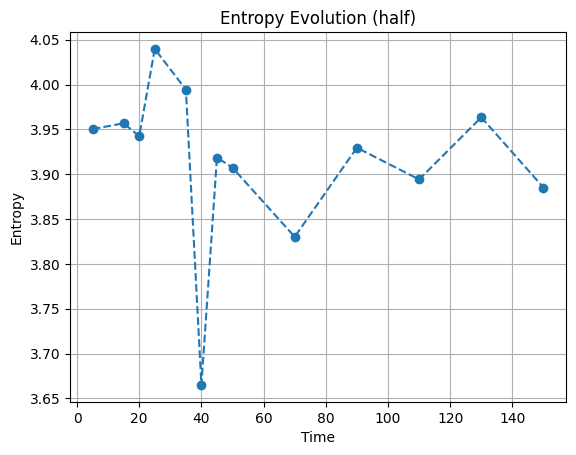

In [68]:
plt.plot(time_u3, entropies_u3, marker='o', linestyle='--')
plt.title("Entropy Evolution (half)")
plt.xlabel("Time")
plt.ylabel("Entropy")
plt.grid(True)
plt.show()

## Regression(from velocity) ##

Time (t)   |   Standard Deviation   |   Time expected (s)
-----------------------------------------------------
t = 5.0     |   Sigma = 0.1166312320   |   14253061707512166.0000
t = 15.0    |   Sigma = 0.0789406084   |   228103155817964468504100864.0000
t = 20.0    |   Sigma = 0.0711378957   |   119948167543616219727018328064.0000
t = 25.0    |   Sigma = 0.0657317633   |   13973094704763367846853774147584.0000
t = 35.0    |   Sigma = 0.0584916116   |   15709711279678916301542873767084032.0000
t = 40.0    |   Sigma = 0.0559657412   |   223985898099371943812720406879535104.0000
t = 45.0    |   Sigma = 0.0538848707   |   2191714007150812617494035383139172352.0000
t = 50.0    |   Sigma = 0.0521415984   |   15868830567988868331402308543060115456.0000


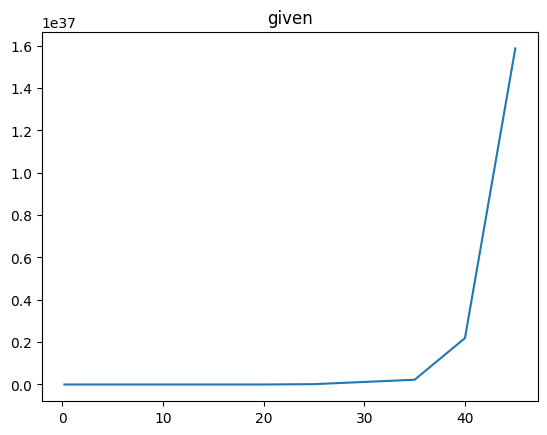

In [69]:
# given case
time_regression_u1 = []
for i in range (0, 8):
    time = (std_devs_u2[i][1] / np.exp(a_u))**(1/b_u)
    time_regression_u1.append(time)
plt.title('given')
plt.plot(time2[:-1], time_regression_u1)

print("Time (t)   |   Standard Deviation   |   Time expected (s)")
print("-----------------------------------------------------")
for (t, std), time_expected in zip(std_devs_u2, time_regression_u1):
    print(f"t = {t:<7} |   Sigma = {std:.10f}   |   {time_expected:.4f}")

Time (t)   |   Standard Deviation   |   Time expected (s)
-----------------------------------------------------
t = 5.0     |   Sigma = 0.1166312320   |   63243681446490930946395602944.0000
t = 15.0    |   Sigma = 0.0789406084   |   312155211373387673668132715936208343480013946880.0000
t = 20.0    |   Sigma = 0.0711378957   |   30114905234272432591611743118963415731588601112166400.0000
t = 25.0    |   Sigma = 0.0657317633   |   183688776950162403213444509118396137673171166745694568448.0000
t = 35.0    |   Sigma = 0.0584916116   |   71293924822291565834876042105335144439876233710685152593575936.0000
t = 40.0    |   Sigma = 0.0559657412   |   9272312585281520286715751380990228537621672984953667238599065600.0000
t = 45.0    |   Sigma = 0.0538848707   |   605095354027780972481776021335860461010330597807737290352391880704.0000
t = 50.0    |   Sigma = 0.0521415984   |   22742596406709389555420306691650926536805241510620356724148028833792.0000


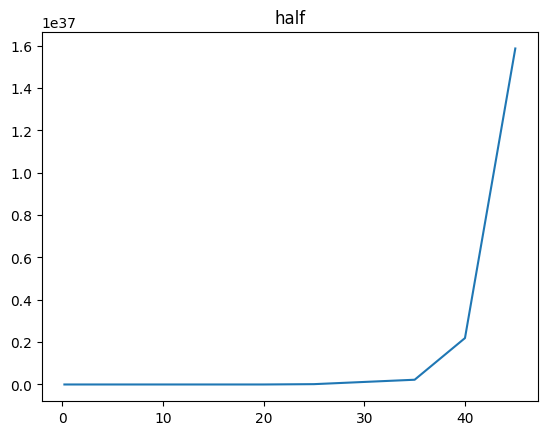

In [70]:
# half case
time_regression_u3 = []
for i in range (0, 8):
    time = (std_devs_u2[i][1] / np.exp(a_u3))**(1/b_u3)
    time_regression_u3.append(time)
plt.title('half')
plt.plot(time2[:-1], time_regression_u1)

print("Time (t)   |   Standard Deviation   |   Time expected (s)")
print("-----------------------------------------------------")
for (t, std), time_expected in zip(std_devs_u2, time_regression_u3):
    print(f"t = {t:<7} |   Sigma = {std:.10f}   |   {time_expected:.4f}")

## Enstrophy ##

In [71]:
def enstrophy(data):
    dx, dy = 6.283/1024, 6.283/1024
    data = data.reshape(1024, 1024)
    enstrophy = np.sum(data**2) * dx * dy
    return enstrophy

In [72]:
for file in files_vor:
    data = pd.read_csv(file, header=None, dtype=str).squeeze()
    data = pd.to_numeric(data, errors='coerce')
    data = data.dropna().values
    all_data.extend(data.tolist())